/var/folders/r6/0smcfgt9415gwpc747f7ghth0000gn/T/ipykernel_72698/1556913972.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brooklynData['hour_beginning'] = pd.to_datetime(brooklynData['hour_beginning'])


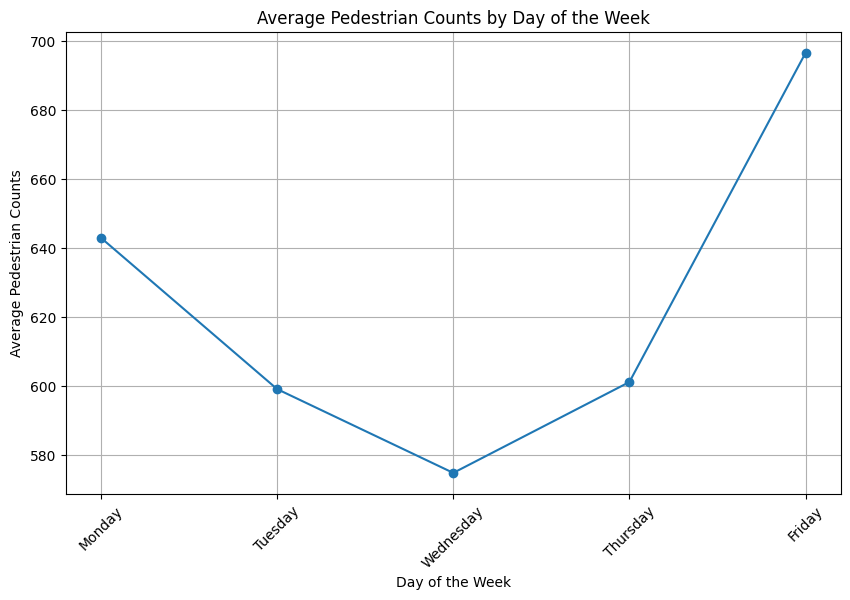

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


brooklynData = pd.read_csv('/Users/ardadinc/Desktop/DataScience Bootcamp/Homeworks/Brooklyn_Bridge_Automated_Pedestrian_Counts_Demonstration_Project.csv')
brooklynData['hour_beginning'] = pd.to_datetime(brooklynData['hour_beginning'])

brooklynData['weekday'] = brooklynData['hour_beginning'].dt.dayofweek


weekdays_data = brooklynData.loc[brooklynData['weekday'].between(0, 4)]
average_counts = weekdays_data.groupby('weekday')['Pedestrians'].mean()


plt.figure(figsize=(10, 6))
average_counts.plot(kind='line', marker='o')
plt.xticks(range(5), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=45)
plt.title('Average Pedestrian Counts by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Pedestrian Counts')
plt.grid(True)
plt.show()

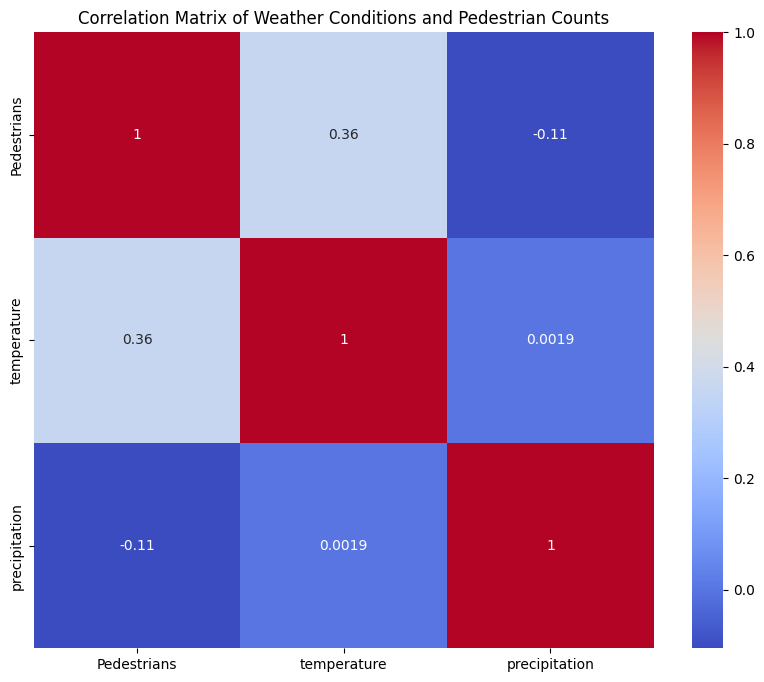

In [8]:
import seaborn as sns
brooklynData['hour_beginning'] = pd.to_datetime(brooklynData['hour_beginning'])
data_2019 = brooklynData[brooklynData['hour_beginning'].dt.year == 2019]

weather_pedestrian_counts = data_2019.groupby('weather_summary')['Pedestrians'].mean().sort_values()
weather_pedestrian_counts

numeric_weather_data = data_2019[['Pedestrians', 'temperature', 'precipitation']]

correlation_matrix = numeric_weather_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Weather Conditions and Pedestrian Counts')
plt.show()

time_of_day
Morning       529.699338
Afternoon    1749.484305
Evening       908.873318
Night          50.086680
Name: Pedestrians, dtype: float64


<Axes: title={'center': 'Average Pedestrian Activity by Time of Day'}, xlabel='time_of_day'>

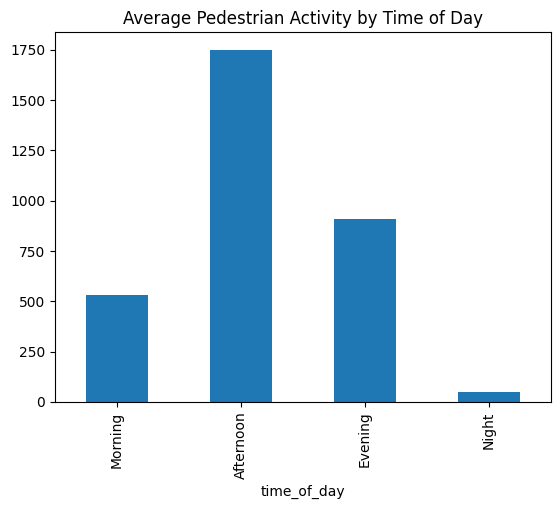

In [10]:
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'
    
    
brooklynData['hour'] = brooklynData['hour_beginning'].dt.hour

brooklynData['time_of_day'] = brooklynData['hour'].apply(categorize_time_of_day)

pedestrian_activity = brooklynData.groupby('time_of_day')['Pedestrians'].mean().reindex(['Morning', 'Afternoon', 'Evening', 'Night'])

print(pedestrian_activity)

pedestrian_activity.plot(kind='bar', title='Average Pedestrian Activity by Time of Day')